In [1]:
# Enable multiple output per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# import library
from os import listdir
from os.path import isfile, join
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import csv

# Read mitigation data

In [3]:
data = pd.read_excel('Mitigation.xlsx')
data

,File_path,Sentence_ID,Sentence,Pair_ID,Drug1_Name,Drug2_Name,Drug_pair,Drug1_type,Drug2_type,DDI,DDI_Type,Mitigation (FC),Unnamed: 12,RM
0,15830476.xml,DDI-MedLine.d29.s2,"(1968, 1970), the higher serum concentrations ...",DDI-MedLine.d29.s2.p1,penicillins,probenecid,penicillins + probenecid,group,drug,True,mechanism,N,NaN,NaN
1,15830476.xml,DDI-MedLine.d29.s2,"(1968, 1970), the higher serum concentrations ...",DDI-MedLine.d29.s2.p2,cephaloridine,probenecid,cephaloridine + probenecid,drug,drug,True,mechanism,N,NaN,NaN
2,7756965.xml,DDI-MedLine.d68.s0,[The effect of cimetidine on the renal excreti...,DDI-MedLine.d68.s0.p12,cimetidine,verografine,cimetidine + verografine,drug,drug,True,mechanism,N,NaN,NaN
3,7756965.xml,DDI-MedLine.d68.s0,[The effect of cimetidine on the renal excreti...,DDI-MedLine.d68.s0.p13,cimetidine,iodamide,cimetidine + iodamide,drug,drug,True,mechanism,N,NaN,NaN
4,2857099.xml,DDI-MedLine.d27.s0,[The GABA-ergic system and brain edema] It has...,DDI-MedLine.d27.s0.p0,picrotoxin,diazepam,diazepam + picrotoxin,drug_n,drug,True,effect,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,11137650.xml,DDI-MedLine.d8.s6,"When combined with ofloxacin, KRM-1648 exhibit...",DDI-MedLine.d8.s6.p8,rifampicin,ofloxacin,ofloxacin + rifampicin,drug,drug,True,effect,N,NaN,NaN
228,11137650.xml,DDI-MedLine.d8.s6,"When combined with ofloxacin, KRM-1648 exhibit...",DDI-MedLine.d8.s6.p9,rifabutin,ofloxacin,ofloxacin + rifabutin,drug,drug,True,effect,N,NaN,NaN
229,2857198.xml,DDI-MedLine.d56.s5,When ouabain was applied to the muscle in the ...,DDI-MedLine.d56.s5.p0,ouabain,phentolamine,ouabain + phentolamine,drug,drug,True,effect,N,NaN,NaN
230,3967572.xml,DDI-MedLine.d7.s4,"With combined use, clinicians should be aware,...",DDI-MedLine.d7.s4.p0,phenytoin,theophylline,phenytoin + theophylline,drug,drug,True,effect,N,NaN,NaN


# Convert mitigation result to binary values

In [4]:
val_dict = {"N":0,"Y":1}
data["Miti_val"] = data["Mitigation (FC)"].map(val_dict)
data

,File_path,Sentence_ID,Sentence,Pair_ID,Drug1_Name,Drug2_Name,Drug_pair,Drug1_type,Drug2_type,DDI,DDI_Type,Mitigation (FC),Unnamed: 12,RM,Miti_val
0,15830476.xml,DDI-MedLine.d29.s2,"(1968, 1970), the higher serum concentrations ...",DDI-MedLine.d29.s2.p1,penicillins,probenecid,penicillins + probenecid,group,drug,True,mechanism,N,NaN,NaN,0
1,15830476.xml,DDI-MedLine.d29.s2,"(1968, 1970), the higher serum concentrations ...",DDI-MedLine.d29.s2.p2,cephaloridine,probenecid,cephaloridine + probenecid,drug,drug,True,mechanism,N,NaN,NaN,0
2,7756965.xml,DDI-MedLine.d68.s0,[The effect of cimetidine on the renal excreti...,DDI-MedLine.d68.s0.p12,cimetidine,verografine,cimetidine + verografine,drug,drug,True,mechanism,N,NaN,NaN,0
3,7756965.xml,DDI-MedLine.d68.s0,[The effect of cimetidine on the renal excreti...,DDI-MedLine.d68.s0.p13,cimetidine,iodamide,cimetidine + iodamide,drug,drug,True,mechanism,N,NaN,NaN,0
4,2857099.xml,DDI-MedLine.d27.s0,[The GABA-ergic system and brain edema] It has...,DDI-MedLine.d27.s0.p0,picrotoxin,diazepam,diazepam + picrotoxin,drug_n,drug,True,effect,N,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,11137650.xml,DDI-MedLine.d8.s6,"When combined with ofloxacin, KRM-1648 exhibit...",DDI-MedLine.d8.s6.p8,rifampicin,ofloxacin,ofloxacin + rifampicin,drug,drug,True,effect,N,NaN,NaN,0
228,11137650.xml,DDI-MedLine.d8.s6,"When combined with ofloxacin, KRM-1648 exhibit...",DDI-MedLine.d8.s6.p9,rifabutin,ofloxacin,ofloxacin + rifabutin,drug,drug,True,effect,N,NaN,NaN,0
229,2857198.xml,DDI-MedLine.d56.s5,When ouabain was applied to the muscle in the ...,DDI-MedLine.d56.s5.p0,ouabain,phentolamine,ouabain + phentolamine,drug,drug,True,effect,N,NaN,NaN,0
230,3967572.xml,DDI-MedLine.d7.s4,"With combined use, clinicians should be aware,...",DDI-MedLine.d7.s4.p0,phenytoin,theophylline,phenytoin + theophylline,drug,drug,True,effect,N,NaN,NaN,0


# Extract unique sentences

In [5]:
new_data = data.groupby(by = ["Sentence"])["Miti_val"].sum().to_frame().reset_index()
new_data
new_data.to_csv("mitigation_results.csv",index=False, encoding='utf-8')

,Sentence,Miti_val
0,"(1968, 1970), the higher serum concentrations ...",0
1,"ADL 8-2698, a trans-3,4-dimethyl-4-(3-hydroxyp...",1
2,ADL-8-2698 is a novel peripherally restricted ...,0
3,Acetaminophen diminished the binding of theoph...,0
4,Acid-catalyzed ethanolysis of temazepam in anh...,0
...,...,...
163,[The GABA-ergic system and brain edema] It has...,0
164,[The effect of cimetidine on the renal excreti...,0
165,"however, patients with moderate to severe card...",0
166,only ibogaine enhances cocaine-induced increas...,0


In [ ]:
with open("Mitigation_results.txt","w") as output_file:
    with open("Mitigation_results.csv", 'r', encoding='utf-8') as input_file:
        i = 0
        _ = output_file.write("index"+"\t"+"Sentence"+"\n")
        for row in csv.reader(input_file):
            # Skip saving the header
            if i == 0:
                i +=1
                continue
            _ = output_file.write(str(i)+"\t")
            _ = output_file.write("".join(row[0])+"\n")
            i +=1
        #_ =[output_file.write("".join(row[0])+"\n") for row in csv.reader(input_file)]

# Prediction results

In [6]:
miti_pred = pd.read_csv("LLM-pred.csv")
miti_pred

,Sentence,Miti_val,chatgpt 4,gemini,Chatgpt 3.5
0,"ADL 8-2698, a trans-3,4-dimethyl-4-(3-hydroxyp...",1,yes,yes,yes
1,Administering InsP(3) together with RR (100-50...,1,yes,yes,yes
2,Both ibogaine and 18-MC block morphine-induced...,1,yes,yes,yes
3,Cypermethrin-induced oxidative stress in rat b...,1,yes,yes,yes
4,Cytochalasin D at 10 microM preferentially blo...,1,no,no,yes
...,...,...,...,...,...
57,Coadministration of fluoxetine significantly d...,0,no,yes,yes
58,Coingestion of acetaminophen with theophylline...,0,no,no,yes
59,Combinations of clindamycin and gentamicin wer...,0,no,no,yes
60,Combinations of clindamycin and gentamicin wer...,0,no,no,yes


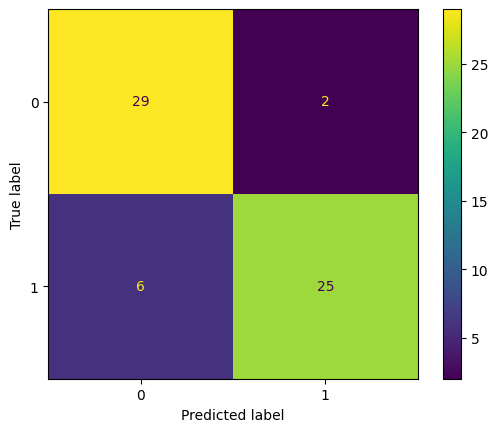

In [12]:
import matplotlib.pyplot as plt
from sklearn import metrics

val_dict = {"no":0,"yes":1}
actual = miti_pred.Miti_val
predicted = miti_pred['chatgpt 4'].map(val_dict)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

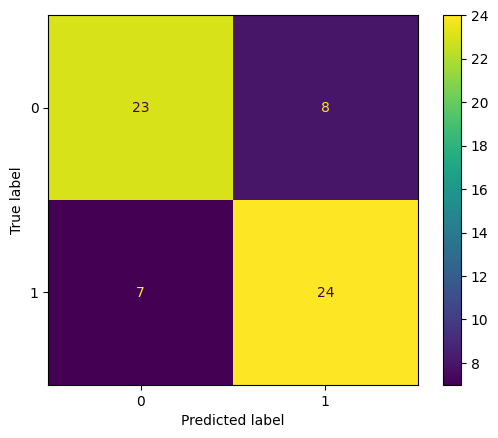

In [13]:
import matplotlib.pyplot as plt
from sklearn import metrics

val_dict = {"no":0,"yes":1}
actual = miti_pred.Miti_val
predicted = miti_pred['gemini'].map(val_dict)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

# 31 Mitigation Sentences with unique drug names

In [10]:
miti_pred[miti_pred.Miti_val == 1]

,Sentence,Miti_val,chatgpt 4,gemini,Chatgpt 3.5
0,"ADL 8-2698, a trans-3,4-dimethyl-4-(3-hydroxyp...",1,yes,yes,yes
1,Administering InsP(3) together with RR (100-50...,1,yes,yes,yes
2,Both ibogaine and 18-MC block morphine-induced...,1,yes,yes,yes
3,Cypermethrin-induced oxidative stress in rat b...,1,yes,yes,yes
4,Cytochalasin D at 10 microM preferentially blo...,1,no,no,yes
5,Dose-response curves (derived from the results...,1,yes,no,yes
6,Exogenous estradiol also appeared to influence...,1,no,yes,yes
7,Haloperidol reduced or eliminated the increase...,1,yes,yes,yes
8,High-dose cisplatin with sodium thiosulfate pr...,1,yes,yes,yes
9,"Ibogaine attenuates, but 18-MC potentiates, th...",1,no,no,yes


In [12]:
drug_pair = pd.merge(miti_pred[miti_pred.Miti_val == 1],data,on = "Sentence",how = "inner")[["Sentence","Drug1_Name","Drug2_Name"]]
drug_pair

def get_unique_drugs(row):
    return set([row['Drug1_Name'], row['Drug2_Name']])

# Combine the drugs into a set per row, then group by 'Sentence' and aggregate using union
drug_pair['unique_drugs'] = drug_pair.apply(get_unique_drugs, axis=1)
grouped = drug_pair.groupby('Sentence')['unique_drugs'].agg(lambda x: set.union(*x)).reset_index()

# Explode the unique_drugs set into multiple rows
Unique_drug = grouped.explode('unique_drugs')

# Rename columns for clarity
Unique_drug.columns = ['Sentence', 'Unique Drug']

Unique_drug

Unique_drug.to_csv("Unique_drug.csv",index=False, encoding='utf-8')


,Sentence,Drug1_Name,Drug2_Name
0,"ADL 8-2698, a trans-3,4-dimethyl-4-(3-hydroxyp...",adl 8-2698,morphine
1,Administering InsP(3) together with RR (100-50...,insp(3),rr
2,Both ibogaine and 18-MC block morphine-induced...,ibogaine,morphine
3,Both ibogaine and 18-MC block morphine-induced...,ibogaine,nicotine
4,Both ibogaine and 18-MC block morphine-induced...,18-mc,morphine
5,Both ibogaine and 18-MC block morphine-induced...,18-mc,nicotine
6,Cypermethrin-induced oxidative stress in rat b...,cypermethrin,vitamin e
7,Cypermethrin-induced oxidative stress in rat b...,cypermethrin,allopurinol
8,Cytochalasin D at 10 microM preferentially blo...,cytochalasin d,carbachol
9,Dose-response curves (derived from the results...,tripelennamine,pentazocine


,Sentence,Unique Drug
0,"ADL 8-2698, a trans-3,4-dimethyl-4-(3-hydroxyp...",adl 8-2698
0,"ADL 8-2698, a trans-3,4-dimethyl-4-(3-hydroxyp...",morphine
1,Administering InsP(3) together with RR (100-50...,rr
1,Administering InsP(3) together with RR (100-50...,insp(3)
2,Both ibogaine and 18-MC block morphine-induced...,ibogaine
...,...,...
28,"Thus, the results suggest that cypermethrin ex...",allopurinol
29,Verapamil also significantly decreased the inc...,verapamil
29,Verapamil also significantly decreased the inc...,bombesin
30,We propose these pharmacokinetic changes to be...,ccnu
